In [3]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from matplotlib.patches import Rectangle

In [4]:
# Function to read text files
def Read(filename,skip=97):
    
    # Read and return data of confirmed exoplanets from NASA Exoplanet Archive
    data = np.genfromtxt(filename,dtype=None,delimiter=',',skip_header=skip,names=True,invalid_raise=False,encoding=None)    
    return data

# 3) Orbital Inclination vs. Semi-Major Axis
## M0V: .559 $R_{\odot}$, KOIII: 9.06$R_{\odot}$ (Pollux https://arxiv.org/abs/1712.08109)
## <u>Grazing transit</u>
### i) Impact parameter (b): $b=acos(i)$
### ii) Grazing condition: $b=acos(i)\leq R_{p}+{R_{*}}$

In [24]:
# Define radii of Earth, Jupiter, and Sun in au
EarthRad = const.R_earth.to(u.au).value
JupRad = const.R_jup.to(u.au).value
SunRad = const.R_sun.to(u.au).value
increment = JupRad/EarthRad/5

# Make array of planet radii from Earth's to Jupiter's
PlRad = np.linspace(EarthRad,JupRad,5)

#Make array of semi-major axes
a = np.linspace(.01,200,2000) # in au
SMA = [[] for i in range(len(PlRad))]

# Make array of inclinations
inc = np.linspace(0.01,180.0,1000)
inclination = [[] for i in range(len(PlRad))]

In [33]:
# Function to calculate minimum semi-major axis & inclination combinations to detect grazing transit
def Grazing(startype):
    
    # startype: for problem 3 either M for M0V or K for K0III
    if startype == 'M':
        multiple = .559 # fractional size of Sun for M0V star
    elif startype == 'K':
        multiple = 9.06 # fractional size of Sun for K0III star
    
    # Define host mass
    HostRad = SunRad*multiple 
    
    # Loop to find orbital properties for minimum grazing transit of different-size planets
    for j in range(0,len(PlRad)):  
        # Upper limit of acos(i) to observe transit
        threshold = PlRad[j]+HostRad
        # Loop over all semi-major axes 
        for x in a:
            # Loop over all inclination angles
            for y in inc:
                # Calculate a*cos(i)
                product = x*np.cos(np.radians(y))
                # Evaluate how close acos(i) is to the threshold
                # if within 1% of the threshold, save the semi-major axis and inclination combo
                if product == threshold:
                    SMA[j].append(x)
                    inclination[j].append(y)
                    print('PlRad={0:.2e}: a={1:.3f},i={2:.3f},acos(i)={3:.6f},R1+R2={4:.6f}'.format(PlRad[j],x,y,product,threshold))
    #print(SMA)
    # Return list-of-lists with a,i info for each planet size
    return(SMA,inclination)

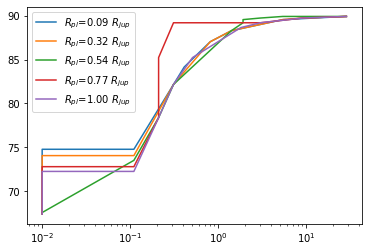

In [34]:
array1,array2 = Grazing('M') 
for i in range(5):
    plt.plot(np.sort(array1[i]),np.sort(array2[i]),label=r'$R_{pl}$=%.2f $R_{jup}$'%(PlRad[i]/JupRad))
    plt.xscale('log')
    plt.legend()

In [29]:
# Function to plot planet radius vs. system distance (save is parameter to save figure or not)
def InclinationSemiMajor(startype,save=False):
    
    # Save data using 'Read' function
    data = Read('table2.csv',skip=76)
    
    # Define x and y datasets to plot
    xdata = []
    ydata = []

    # Define list of symbols to use for different discovery methods
    markers = ['o','v','1','8','s','p','P','*','H','X','D']

    # Establish figure and axis object for plotting
    plt.figure(figsize=(10,6))
    ax = plt.subplot(111)    
    
    # Use Grazing Function
    SMA,inclinations=Grazing(startype)
    colors = ['b','g','r','c','m']
    
    for j in range(0,len(SMA)):
        if j == 0:
            phrase = 'Earth-size'
        elif j == len(SMA)-1:
            phrase = 'Jupiter-size'
        else:
            phrase = str(np.round(increment*j,2))+r'$R_{\oplus}$'
        # Plot trendlines to show grazing transit
        ax.plot(np.sort(SMA[j]),np.sort(inclinations[j]),color=colors[j],label=phrase,linewidth=2)
        ax.set_xscale('log')
        
    # Identifty locations of data points for each discovery method
    detections = np.where(data['pl_discmethod'] == 'Transit')

    # Define x (mass) and y (semi-major axis) datasets to plot
    x = data['pl_orbsmax'][detections]
    y = data['pl_orbincl'][detections]

    # Make a scatter plot for each datset with a new symbol for each discovery method
    ax.scatter(x,y,label='Transit',marker=markers[1])
    ax.set_xscale('log')
    
    # Set axis labels, title, and legend (legend outside of figure)
    if startype=='K':
        host = 'K0III'
    elif startype=='M':
        host = 'M0V'
    ax.set_title(r'Orbital Inclination vs. Semi-Major Axis (Host: '+host+')')
    ax.set_xlabel(r'log(a) (au)')
    ax.set_ylabel('i')
    ax.legend(loc='center left',bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    # Decide whether or not to save file
    if save == True:
        plt.savefig('/d/users/jimmy/Documents/Planets/HW_plot.jpg')
        
    # Show plot
    plt.show()

PlRad=4.26e-05: a=0.110,i=67.574,acos(i)=0.041981,R1+R2=0.042176
PlRad=4.26e-05: a=0.410,i=84.149,acos(i)=0.041811,R1+R2=0.042176
PlRad=4.26e-05: a=0.810,i=87.032,acos(i)=0.041956,R1+R2=0.042176
PlRad=4.26e-05: a=1.411,i=88.293,acos(i)=0.042011,R1+R2=0.042176
PlRad=4.26e-05: a=5.412,i=89.555,acos(i)=0.042077,R1+R2=0.042176
PlRad=4.26e-05: a=28.123,i=89.915,acos(i)=0.041763,R1+R2=0.042176
PlRad=4.26e-05: a=28.223,i=89.915,acos(i)=0.041911,R1+R2=0.042176
PlRad=4.26e-05: a=28.323,i=89.915,acos(i)=0.042060,R1+R2=0.042176
PlRad=1.51e-04: a=0.110,i=67.574,acos(i)=0.041981,R1+R2=0.042285
PlRad=1.51e-04: a=0.310,i=82.168,acos(i)=0.042264,R1+R2=0.042285
PlRad=1.51e-04: a=0.810,i=87.032,acos(i)=0.041956,R1+R2=0.042285
PlRad=1.51e-04: a=1.411,i=88.293,acos(i)=0.042011,R1+R2=0.042285
PlRad=1.51e-04: a=5.412,i=89.555,acos(i)=0.042077,R1+R2=0.042285
PlRad=1.51e-04: a=9.114,i=89.735,acos(i)=0.042194,R1+R2=0.042285
PlRad=1.51e-04: a=28.223,i=89.915,acos(i)=0.041911,R1+R2=0.042285
PlRad=1.51e-04: a=28.

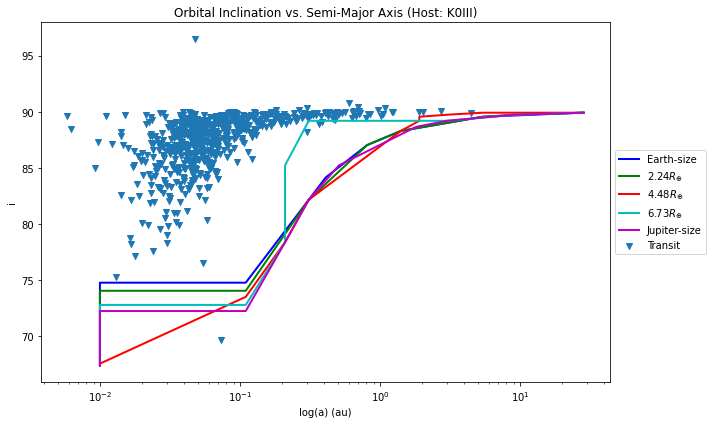

In [30]:
InclinationSemiMajor('K')